In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
df = pd.read_csv('-Telco-Customer-Churn.csv')

In [ ]:
df.head()
df.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
for col in df.select_dtypes('object').columns:
    df[col] = df[col].astype('category').cat.codes

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int16  
 1   gender            7043 non-null   int8   
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int8   
 4   Dependents        7043 non-null   int8   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int8   
 7   MultipleLines     7043 non-null   int8   
 8   InternetService   7043 non-null   int8   
 9   OnlineSecurity    7043 non-null   int8   
 10  OnlineBackup      7043 non-null   int8   
 11  DeviceProtection  7043 non-null   int8   
 12  TechSupport       7043 non-null   int8   
 13  StreamingTV       7043 non-null   int8   
 14  StreamingMovies   7043 non-null   int8   
 15  Contract          7043 non-null   int8   
 16  PaperlessBilling  7043 non-null   int8   


In [25]:
#Drop useless columns
df.drop(['customerID'], axis=1, inplace=True)

In [26]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7906316536550745
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


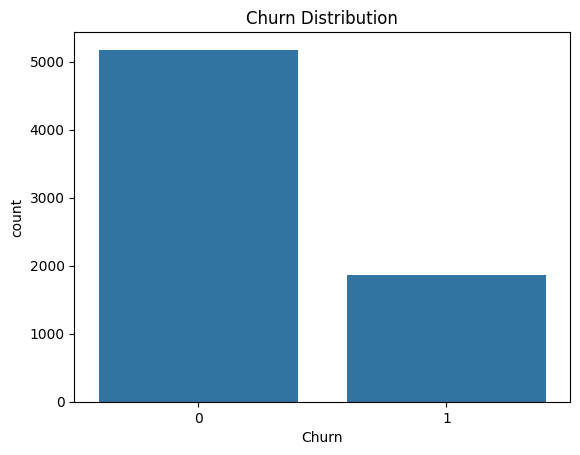

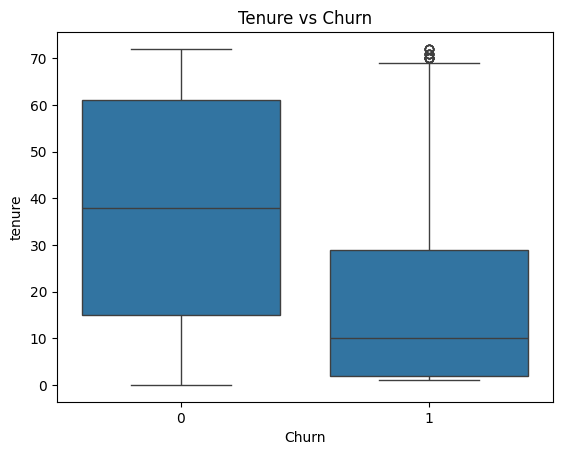

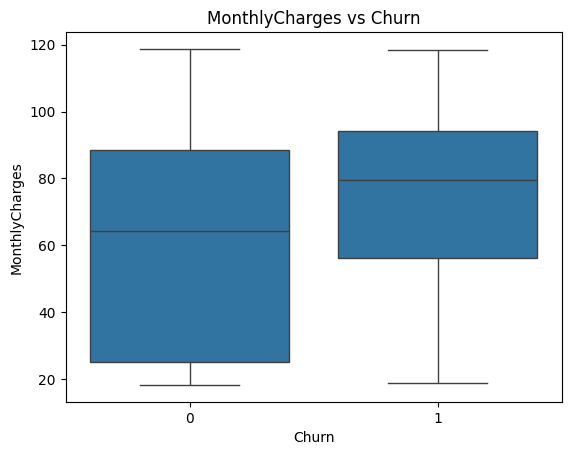

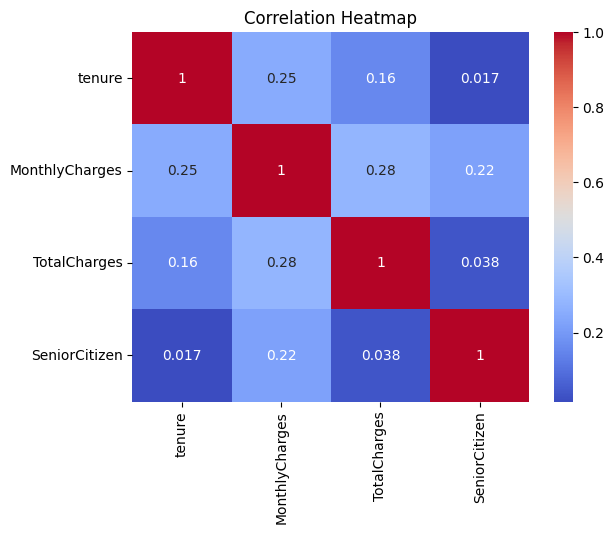

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# Count of churn vs stay
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

# MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs Churn')
plt.show()

# Correlation heatmap for numeric features
numeric_cols = ['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are defined
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Train the model


RandomForestClassifier(random_state=42)

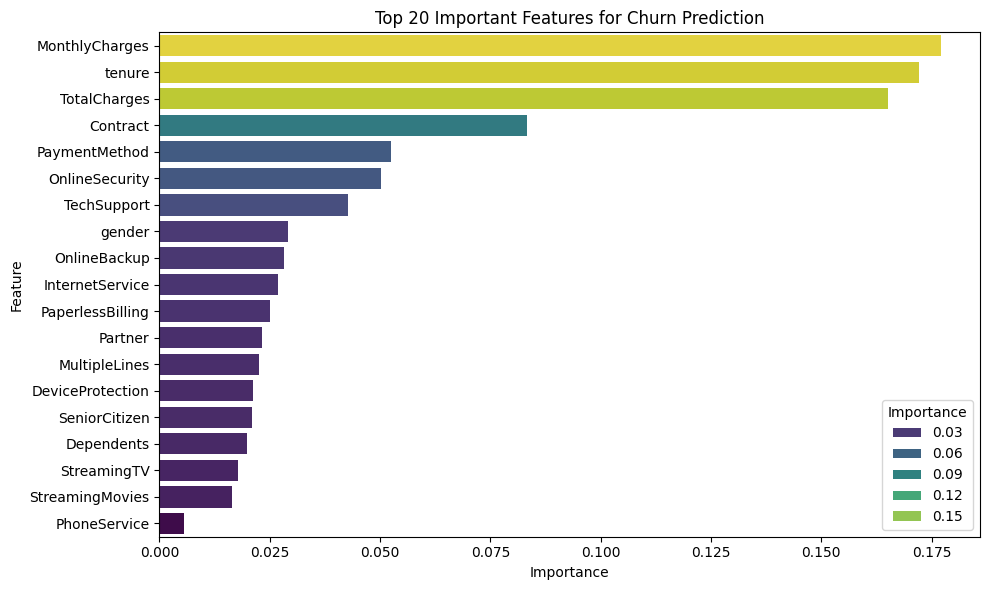

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

#Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

#Create a DataFrame for easier plotting
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(20)  # Top 20 features

#Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp,hue='Importance',palette='viridis' )
plt.title("Top 20 Important Features for Churn Prediction")
plt.tight_layout()
plt.show()


In [32]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [51]:
#Base Model
base_xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)
base_xgb.fit(X_train, y_train)

# Base model accuracy
y_pred_base = base_xgb.predict(X_test)
base_acc = accuracy_score(y_test, y_pred_base)
print(f"Base Model Accuracy: {base_acc:.4f}")

#Hyperparameter Tuning 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

#Best Model
print("\nBest Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

best_xgb = grid.best_estimator_
y_pred_best = best_xgb.predict(X_test)

# After tuning accuracy
best_acc = accuracy_score(y_test, y_pred_best)
print(f"Test Accuracy After Tuning: {best_acc:.4f}")

#Compare Results
print("\n🔹 Accuracy Comparison:")
print(f"  Base Model Test Accuracy:     {base_acc:.4f}")
print(f"  After Hyperparameter Tuning:  {best_acc:.4f}")
print(f"  Cross-Validation (GridSearch): {grid.best_score_:.4f}")

#Detailed Report
print("\nClassification Report (Best Model):\n")
print(classification_report(y_test, y_pred_best))

Base Model Accuracy: 0.7871
Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:14:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
Best Cross-Validation Accuracy: 0.8054668086616968
Test Accuracy After Tuning: 0.8077

🔹 Accuracy Comparison:
  Base Model Test Accuracy:     0.7871
  After Hyperparameter Tuning:  0.8077
  Cross-Validation (GridSearch): 0.8055

Classification Report (Best Model):

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[948  87]
 [191 183]]


In [50]:
customer = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'MonthlyCharges': 70.35,
    'TotalCharges': 845.0,
    'Contract': 'Month-to-month',
    'InternetService': 'Fiber optic'
}


In [37]:
import pandas as pd

customer_df = pd.DataFrame([customer])


In [38]:
print(type(model))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [39]:
# Apply pd.get_dummies
customer_df = pd.get_dummies(customer_df)

# Match training columns
customer_df = customer_df.reindex(columns=X_train.columns, fill_value=0)

# Predict
prediction = model.predict(customer_df)
print(prediction)

[1]


1 means customer is likely to churn and output is 0 means customer is likely to stay 

In [40]:
probability = model.predict_proba(customer_df)
print("Churn Probability:", round(probability[0][1]*100, 2), "%")


Churn Probability: 61.42 %


In [41]:
new_customers = [
    {
        'gender': 'Female',
        'SeniorCitizen': 0,
        'Partner': 'Yes',
        'Dependents': 'No',
        'tenure': 12,
        'MonthlyCharges': 70.35,
        'TotalCharges': 845.0,
        'Contract': 'Month-to-month',
        'InternetService': 'Fiber optic'
    }
]


In [42]:
import pandas as pd

def predict_single_customer(model, customer_dict, X_train_columns):
    """
    Predict churn for a single customer.
    """
    # Convert customer dict to DataFrame
    customer_df = pd.DataFrame([customer_dict])
    
    # Apply pd.get_dummies
    customer_df = pd.get_dummies(customer_df)
    
    # Match training columns
    customer_df = customer_df.reindex(columns=X_train_columns, fill_value=0)
    
    # Predict class and probability
    prediction = model.predict(customer_df)
    probability = model.predict_proba(customer_df)
    
    # Friendly output
    if prediction[0] == 1:
        status = "🔴 Likely to CHURN"
    else:
        status = "🟢 Likely to STAY"
    
    print(f"{status} (Churn Probability: {round(probability[0][1]*100, 2)}%)")
    return prediction[0], probability[0][1]


In [43]:
new_customer = {
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'Yes',
    'tenure': 48,
    'MonthlyCharges': 50.75,
    'TotalCharges': 2436.0,
    'Contract': 'Two year',
    'InternetService': 'DSL',
    'PaymentMethod': 'Bank transfer (automatic)'
}

predict_single_customer(model, new_customer, X_train.columns)


🟢 Likely to STAY (Churn Probability: 28.57%)


(np.int8(0), np.float64(0.28565974182894566))

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(class_weight={0:1, 1:2}, random_state=42)

# Fit the model on training data
model.fit(X_train, y_train)  # X_train and y_train are your training features & target

# Now you can predict
threshold = 0.3
y_pred_custom = (model.predict_proba(X_test)[:,1] >= threshold).astype(int)


In [45]:
# Set a threshold lower than 0.5 to catch more churners
threshold = 0.3

# Predict based on threshold
y_pred_custom = (model.predict_proba(X_test)[:,1] >= threshold).astype(int)


In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_custom)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[779 256]
 [104 270]]
